# CubeSpec Fine Steering Mirror

This dataset contains experimental data from a high-dimensional MIMO system, excited with orthogonal random-phase multisines. See https://github.com/merijnfloren/fsm-benchmark-data for more details.

Note that running this file multiple times, or on different machines, with the same parameters may yield different results due to the non-deterministic nature of GPU parallel execution.

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import optimistix as optx
from matplotlib import gridspec, rcParams
from matplotlib.lines import Line2D

import freq_statespace as fss

# Load data
u_train, y_train = np.load("u_300mV_train.npy"), np.load("y_300mV_train.npy")
u_test, y_test = np.load("u_300mV_test.npy"), np.load("y_300mV_test.npy")

N = u_train.shape[0]
nu, ny = u_train.shape[1], y_train.shape[1]

fs = 6400  # [Hz]
f_max = 3000  # [Hz] 
f_idx = np.arange(1, math.ceil(f_max / (fs / N)))  # frequency lines of interest (excludes DC)

data = fss.create_data_object(u_train, y_train, f_idx, fs)

In [2]:
# Fit Best Linear Approximation
nx = 28  # state dimension
freq_weighting = False  # when the goal is to minimize the time-domain simulation error, it is sometimes better to disable frequency weighting

solver = optx.BFGS(rtol=1e-3, atol=1e-5)

bla = fss.lin.subspace_id(data, nx, freq_weighting=freq_weighting)
bla = fss.lin.optimize(bla, data, solver=solver, print_every=100, freq_weighting=freq_weighting)

=============== Frequency-domain subspace identification ===============
BLA simulation error:
    output 1: 4.40%.
    output 2: 6.58%.
    output 3: 4.75%.

=========================== BLA optimization ===========================
Starting iterative optimization...
    Iter 1 | loss = 8.0683e-04
    Iter 101 | loss = 6.6682e-04
    Iter 201 | loss = 5.8677e-04
    Iter 301 | loss = 5.8435e-04
    Iter 401 | loss = 5.8241e-04
Optimization completed in 2.99s (465 iterations, 5.88ms/iter).

BLA simulation error:
    output 1: 3.83%.
    output 2: 5.89%.
    output 3: 4.13%.



In [3]:
### Inference and learning ###

# Define the nonlinear basis function
degree = 7
nw, nz = 6, 12
phi = fss.static.basis.Polynomial(nz, degree, cross_terms=False)

# Solve the problem
solver = optx.BFGS(rtol=1e-3, atol=1e-6)
nllfr = fss.nonlin.inference_and_learning(
    bla, data, phi, nw, solver=solver, print_every=10, freq_weighting=freq_weighting
)

==================== NL-LFR inference and learning =====================
Starting iterative optimization...
    BLA loss: 5.4454e+01
    Iter 1 | loss = 1.0823e+02
    Iter 11 | loss = 1.0823e+02
    Iter 21 | loss = 8.5009e+01
    Iter 31 | loss = 6.4773e+01
    Iter 41 | loss = 5.6895e+01
    Iter 51 | loss = 5.4031e+01
    Iter 61 | loss = 4.9911e+01
    Iter 71 | loss = 4.8288e+01
    Iter 81 | loss = 4.5905e+01
    Iter 91 | loss = 4.4361e+01
    Iter 101 | loss = 4.3634e+01
    Iter 111 | loss = 4.3020e+01
    Iter 121 | loss = 4.2578e+01
    Iter 131 | loss = 4.1733e+01
    Iter 141 | loss = 4.1252e+01
    Iter 151 | loss = 4.0756e+01
    Iter 161 | loss = 4.0279e+01
    Iter 171 | loss = 4.0024e+01
    Iter 181 | loss = 3.9744e+01
    Iter 191 | loss = 3.9461e+01
    Iter 201 | loss = 3.9243e+01
    Iter 211 | loss = 3.9077e+01
    Iter 221 | loss = 3.8895e+01
    Iter 231 | loss = 3.8791e+01
    Iter 241 | loss = 3.8665e+01
    Iter 251 | loss = 3.8552e+01
    Iter 261 | loss 

In [ ]:
### Final optimization ###
nllfr = fss.nonlin.optimize(nllfr, data, solver=solver, freq_weighting=freq_weighting)

# Not a lot of improvement... It might be better to spend more iterations on the initial inference_and_learning step,
# or to solve the inference and learning problem for multiple random seeds, different basis functions, etc..
# Note, though, that this cell can be run multiple times to further optimize the model.
# Note also that the nonlinearity mainly stems from hysteresis, which is hard to capture with static basis functions.

========================= NL-LFR optimization ==========================
Starting iterative optimization...
    BLA loss: 5.4454e+01
    Iter 1 | loss = 3.7177e+01
    Iter 2 | loss = 3.7177e+01
    Iter 3 | loss = 3.7177e+01
    Iter 4 | loss = 3.7177e+01
    Iter 5 | loss = 3.7177e+01
    Iter 6 | loss = 3.7177e+01
    Iter 7 | loss = 3.7177e+01
    Iter 8 | loss = 3.7177e+01
    Iter 9 | loss = 3.7177e+01
    Iter 10 | loss = 3.7177e+01
    Iter 11 | loss = 3.7177e+01
    Iter 12 | loss = 3.7177e+01
    Iter 13 | loss = 3.7177e+01
    Iter 14 | loss = 3.7177e+01
    Iter 15 | loss = 3.7177e+01
    Iter 16 | loss = 3.7177e+01
    Iter 17 | loss = 3.7177e+01
    Iter 18 | loss = 3.7177e+01
    Iter 19 | loss = 3.7177e+01
    Iter 20 | loss = 3.7177e+01
    Iter 21 | loss = 3.7177e+01
    Iter 22 | loss = 3.7177e+01
    Iter 23 | loss = 3.7177e+01
    Iter 24 | loss = 3.7177e+01
    Iter 25 | loss = 3.7176e+01
    Iter 26 | loss = 3.7176e+01
    Iter 27 | loss = 3.7176e+01
    Iter 28 

BLA averaged test error:
    Output 1: 3.89%
    Output 2: 5.87%
    Output 3: 4.21%
NL-LFR averaged test error:
    Output 1: 3.39%
    Output 2: 5.32%
    Output 3: 3.67%


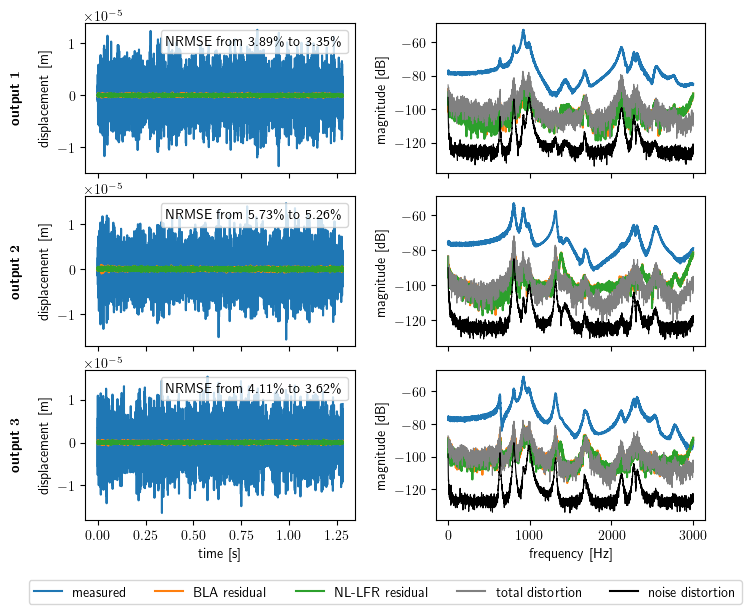

In [5]:
### Evaluate model performance on test data ###
y_test_bla = bla.simulate(u_test, offset=1000)[0]
y_test_nllfr = nllfr.simulate(u_test, offset=1000)[0]

# Compute averaged NRMSE per output channel
norm = np.mean(y_test**2, axis=(0, 2, 3))
error_bla = y_test - y_test_bla
mse_bla = np.mean(error_bla**2, axis=(0, 2, 3))
nrmse_bla = 100 * np.sqrt(mse_bla / norm) 

error_nllfr = y_test - y_test_nllfr
mse_nllfr = np.mean(error_nllfr**2, axis=(0, 2, 3))
nrmse_nllfr = 100 * np.sqrt(mse_nllfr / norm)

print("BLA averaged test error:")
for i, val in enumerate(nrmse_bla):
    print(f"    Output {i+1}: {val:.2f}%")

print("NL-LFR averaged test error:")
for i, val in enumerate(nrmse_nllfr):
    print(f"    Output {i+1}: {val:.2f}%")


### Plot results ###

# Enable LaTeX rendering for text
rcParams['text.usetex'] = True

# Figure and layout setup
fig = plt.figure(figsize=(8, 7))
gs = gridspec.GridSpec(4, 2, height_ratios=[2, 2, 2, .25], hspace=0.2, wspace=0.3)

# # Compute NRMSE per output
NRMSE_list_bla = 100 * np.sqrt(np.mean(error_bla**2, axis=0) / np.mean(y_test**2, axis=0))
NRMSE_list_nllfr = 100 * np.sqrt(np.mean(error_nllfr**2, axis=0) / np.mean(y_test**2, axis=0))

# Frequency-domain quantities
Y_test = np.fft.rfft(y_test, axis=0)[f_idx, :]
Y_test_abs = np.mean(np.abs(Y_test), axis=(2, 3))

Y_error_bla = np.fft.rfft(error_bla, axis=0)[f_idx, :]
Y_error_bla_abs = np.mean(np.abs(Y_error_bla), axis=(2, 3))
Y_error_nllfr = np.fft.rfft(error_nllfr, axis=0)[f_idx, :]
Y_error_nllfr_abs = np.mean(np.abs(Y_error_nllfr), axis=(2, 3))

# Distortion levels
U_abs = np.abs(data.freq.U[f_idx]).mean(axis=2, keepdims=True)
std_tot = data.norm.y_std * np.sqrt(data.freq.G_bla.var_tot) @ U_abs
std_noise = data.norm.y_std * np.sqrt(data.freq.G_bla.var_noise) @ U_abs

axs_mag = []
for i in range(3):
    # Time-domain plots
    ax_time = fig.add_subplot(gs[i, 0])
    ax_time.plot(data.time.t, y_test[:, i, 0, 0])
    ax_time.plot(data.time.t, error_bla[:, i, 0, 0])
    ax_time.plot(data.time.t, error_nllfr[:, i, 0, 0])
    if i < 2:
        ax_time.set_xticklabels([])
    else:
        ax_time.set_xlabel("time [s]")
    ax_time.set_ylabel(rf"$\textbf{{output }} \mathbf{{{i+1}}}$" + "\n\n" + r"displacement [m]")

    # NRMSE legend
    nrmse_text = Line2D(
        [], [], linestyle='None', marker='', 
        label=f'NRMSE from {NRMSE_list_bla[i, 0, 0]:.2f}\% to {NRMSE_list_nllfr[i, 0, 0]:.2f}\%'
    )
    ax_time.legend(handles=[nrmse_text], loc='upper right', frameon=True, 
                   handlelength=0, handletextpad=0)

    # Frequency-domain plots
    ax_mag = fig.add_subplot(gs[i, 1])
    ax_mag.plot(data.freq.f[data.freq.f_idx], 20*np.log10(Y_test_abs[:, i]))
    ax_mag.plot(data.freq.f[data.freq.f_idx], 20*np.log10(Y_error_bla_abs[:, i]))
    ax_mag.plot(data.freq.f[data.freq.f_idx], 20*np.log10(Y_error_nllfr_abs[:, i]))
    ax_mag.plot(data.freq.f[data.freq.f_idx], 20*np.log10(std_tot[:, i]), 
                color='grey', linewidth=0.8)
    ax_mag.plot(data.freq.f[data.freq.f_idx], 20*np.log10(std_noise[:, i]), 
                color='black', linewidth=0.8)
    if i < 2:
        ax_mag.set_xticklabels([])
    else:
        ax_mag.set_xlabel("frequency [Hz]")
    ax_mag.set_ylabel("magnitude [dB]")
    axs_mag.append(ax_mag)

# Legend and layout
ax_legend = fig.add_subplot(gs[3, :])
ax_legend.axis('off')
fig.align_ylabels(axs_mag)

main_legend = [
    Line2D([0], [0], label='measured'),
    Line2D([0], [0], color='C1', label='BLA residual'),
    Line2D([0], [0], color='C2', label='NL-LFR residual'),
    Line2D([0], [0], color='grey', label='total distortion'),
    Line2D([0], [0], color='black', label='noise distortion'),
]

fig.legend(handles=main_legend, loc='lower center', ncol=5, frameon=True,
           borderaxespad=0.0, bbox_to_anchor=(0.5, 0.05))

plt.show()

# The total distortion level combines nonlinear and noise distortions. The fact that the
# BLA residual is close to this level shows that the BLA captures nearly all behaviour a
# linear model can. As the nonlinearity (hysteresis) is dynamic, a nonlinear model with
# a dynamic nonlinear function is probably required to further reduce the gap between 
# the NL-LFR residual and noise distortion level.